# Car Damage Detection Using YOLOv11
## Project Overview
In this notebook, we demonstrate the use of the YOLOv11 model for detecting car damage using the Roboflow dataset. The primary goal of this project is to build an automated system for rental car companies to detect and classify damage in rental vehicles.

### Objectives:
1. Set up the YOLOv11 model for damage detection.
2. Train the model using the Roboflow car damage detection dataset.
3. Evaluate and visualize the model's performance.

In [ ]:
# Install necessary dependencies
!pip install roboflow
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.5/882.5 kB 22.7 MB/s eta 0:00:00


## Step 1: Download and Prepare the Dataset
In this step, we connect to Roboflow using its API and download the car damage detection dataset. Ensure that you replace the API key with your own key for access.


In [ ]:
# Download the car damage detection dataset from Roboflow
from roboflow import Roboflow

# Insert your API key here
API_KEY = '9PKv49fH4SfQpSjGUWxk'
rf = Roboflow(api_key=API_KEY)

# Access the project and download the dataset
project = rf.workspace("trialworkspace-n8ail").project("car-damage-detection-dzxim")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Car-Damage-Detection-1 in yolov11:: 100%|██████████| 908/908 [00:00<00:00, 2928.27it/s]


## Step 2: Verify CUDA Availability
This step checks if the GPU is available for training. Using a GPU can significantly reduce training time.


In [ ]:
# Check for CUDA availability
import torch
print(f"CUDA is available: {torch.cuda.is_available()}")

CUDA is available: True


## Step 3: Train the YOLOv11 Model
We train the YOLOv11 model using the specified dataset for 30 epochs. The `task=detect` argument indicates that we are using YOLO for object detection.


In [ ]:
# Train the YOLOv11 model with the car damage dataset
!yolo task=detect mode=train model=yolo11l.pt data={dataset.location}/data.yaml epochs=30 imgsz=640 batch=16


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 49.0M/49.0M [00:00<00:00, 108MB/s] 
Ultralytics 8.3.8 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=/content/Car-Damage-Detection-1/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json

## Step 4: Predict Using the Trained Model
Once the model is trained, we use it to predict damage on a sample image. We specify a confidence threshold to filter out less probable detections.


In [ ]:
# Use the trained model to predict damage on a sample image
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source=/content/Car-Damage-Detection-1/train/images/0000001625_jpg.rf.9b2ae739c47d790a51b89d70fa844a6a.jpg imgsz=640 conf=0.05

Ultralytics 8.3.8 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11l summary (fused): 464 layers, 25,281,625 parameters, 0 gradients, 86.6 GFLOPs

image 1/1 /content/Car-Damage-Detection-1/train/images/0000001625_jpg.rf.9b2ae739c47d790a51b89d70fa844a6a.jpg: 640x640 2 Glass_Breaks, 1 Scratch, 47.4ms
Speed: 2.8ms preprocess, 47.4ms inference, 610.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


## Step 5: Visualize the Results
Visualize the predictions on the sample image to verify that the model is correctly identifying damaged areas on the vehicle.

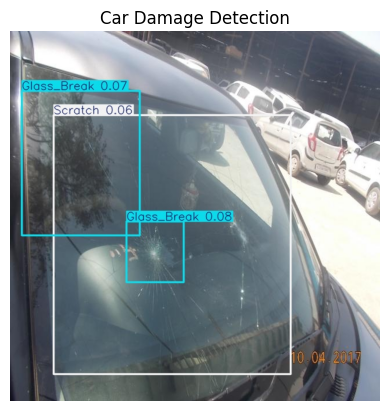

In [ ]:
# Visualization of the prediction results
import cv2
import matplotlib.pyplot as plt

# Load the image with predictions
img = cv2.imread('/content/runs/detect/predict/0000001625_jpg.rf.9b2ae739c47d790a51b89d70fa844a6a.jpg')

# Display the image using matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Car Damage Detection")
plt.axis("off")
plt.show()